## **Python**

In [ ]:
# import pandas as pd
# import yfinance as yf
# import datetime
# import numpy as np

In [ ]:
# payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# df = pd.DataFrame(payload[0])
# tickers_symbols = df['Symbol'].values.tolist()
# GICS_sectors = df['GICS Sector'].values.tolist()

# start_date = '2019-01-01'
# end_date = '2019-12-31'

# data_list = []
# for t,s in zip(tickers_symbols, GICS_sectors):
#     tmp = yf.download(t, start=start_date, end=end_date, progress=True)
#     tmp.reset_index(inplace=True)
#     tmp['Ticker'] = t
#     tmp['GICS'] = s
#     data_list.append(tmp)
# data = pd.concat(data_list, ignore_index=True)

In [ ]:
df = pd.read_excel('/content/GICS.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

In [ ]:
log_return_cols = [
    'Energy', 'Utilities', 'IT', 'Materials', 'Industrials',
    'ConsumerDiscretionary', 'ConsumerStaples', 'healthcare',
    'Financials', 'CommunicationServices', 'RealEstate', 'sp500', 'wti_spot']

# log returns
log_returns = np.log(df[log_return_cols] / df[log_return_cols].shift(1))
log_returns.columns = [f'logret_{col}' for col in log_returns.columns]

# Macroeconomic control variables
control_vars = ['VIX']
processed_df = pd.concat([log_returns, df[control_vars]], axis=1).dropna()
processed_df.head()

In [ ]:
from statsmodels.tsa.stattools import adfuller

cols_to_test = ['logret_sp500', 'logret_wti_spot', 'VIX']

print("Performing Augmented Dickey-Fuller test for stationarity:")
for col in cols_to_test:
    print(f"\nTesting: {col}")
    if col in processed_df.columns:
        try:
            adf_test = adfuller(processed_df[col])
            print(f'ADF Statistic: {adf_test[0]}')
            print(f'P-value: {adf_test[1]}')
            print('Critical Values:')
            for key, value in adf_test[4].items():
                print(f'   {key}: {value}')

            # Interpretation based on p-value
            if adf_test[1] < 0.05:
                print(f"Conclusion: Reject H0 (Series is likely stationary at 5% significance level)")
            else:
                print(f"Conclusion: Fail to reject H0 (Series might be non-stationary at 5% significance level)")

        except ValueError as e:
            print(f"Could not perform ADF test on {col}. Error: {e}")
            print("This might happen if the series contains NaNs or has insufficient data points.")
    else:
        print(f"Column '{col}' not found in processed_df.")

##**R**

In [ ]:
library(readxl)

df <- read_excel("/content/GICS.xlsx")
df$Date <- as.Date(df$Date)
head(df)

Date,Energy,Utilities,IT,Materials,Industrials,ConsumerDiscretionary,ConsumerStaples,healthcare,Financials,CommunicationServices,RealEstate,sp500,wti_spot,VIX
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2005-01-07,279.00,137.31,318.82,177.15,282.06,271.24,237.46,345.72,404.77,126.39,115.03,1186.19,44.07,13.49
2005-01-14,288.84,139.93,316.34,178.17,280.46,272.62,238.60,344.68,400.20,122.03,114.63,1184.52,46.79,12.43
2005-01-21,287.36,139.53,307.49,175.74,275.18,266.17,237.98,340.69,396.96,120.75,115.50,1167.87,47.85,14.36
2005-01-28,293.39,142.75,308.91,175.57,278.66,264.30,239.43,338.96,396.53,119.34,111.19,1171.36,48.56,13.24
2005-02-04,311.19,147.91,316.27,181.67,283.76,269.95,243.74,345.94,408.69,123.30,115.11,1203.03,46.97,11.21
2005-02-11,319.34,147.25,315.58,182.87,285.35,269.58,241.74,347.25,410.18,120.51,117.55,1205.30,46.08,11.43


## **Calculate log returns for all columns except 'Date' and 'VIX'**

In [ ]:
library(dplyr)

log_return_cols_r <- setdiff(colnames(df), c("Date", "VIX"))
df_logret <- df[c("Date", "VIX")]
df_logret[paste0("logret_", log_return_cols_r)] <- sapply(df[log_return_cols_r], function(x) c(NA, diff(log(x))))
df_logret <- na.omit(df_logret)
head(df_logret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Date,VIX,logret_Energy,logret_Utilities,logret_IT,logret_Materials,logret_Industrials,logret_ConsumerDiscretionary,logret_ConsumerStaples,logret_healthcare,logret_Financials,logret_CommunicationServices,logret_RealEstate,logret_sp500,logret_wti_spot
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2005-01-14,12.43,0.034661120,0.018901154,-0.007809096,0.0057413194,-0.005688702,0.005074846,0.004789321,-0.003012749,-0.011354582,-0.03510545,-0.003483414,-0.001408861,0.05989023
2005-01-21,14.36,-0.005137116,-0.002862666,-0.028375018,-0.0137325206,-0.019005683,-0.023943682,-0.002601873,-0.011643477,-0.008128902,-0.01054462,0.007560980,-0.014156052,0.02240161
2005-01-28,13.24,0.020766997,0.022815217,0.004607406,-0.0009678063,0.012566972,-0.007050381,0.006074462,-0.005090867,-0.001083820,-0.01174573,-0.038030080,0.002983890,0.01472903
2005-02-04,11.21,0.058900876,0.035509132,0.023546307,0.0341540307,0.018136410,0.021151935,0.017840985,0.020383243,0.030205222,0.03264385,0.034647743,0.026677907,-0.03329105
2005-02-11,11.43,0.025852708,-0.004472158,-0.002184064,0.0065836634,0.005587687,-0.001371564,-0.008239315,0.003779632,0.003639165,-0.02288767,0.020975582,0.001885124,-0.01913008
2005-02-18,11.18,0.044015986,-0.005038137,-0.012499366,0.0261759730,-0.005728661,-0.004088769,-0.002526561,0.012335412,-0.025256548,-0.01353404,-0.006657587,-0.003082819,0.03706495


In [ ]:
# log_return_cols_r <- setdiff(colnames(df), c("Date", "VIX"))
# df_logret <- df[c("Date", "VIX")]

# df_logret[paste0("logret_", log_return_cols_r)] <- log(df[log_return_cols_r] / lag(df[log_return_cols_r]))
# df_logret <- na.omit(df_logret)
# head(df_logret)

In [ ]:
install.packages("bvarsv")
library(bvarsv)

## **Ensure data is a T x N matrix (Y), where T is time and N is the number of variables (e.g., Oil Returns, S&P 500 Returns, VIX, etc.)**

In [ ]:
Y_raw <- as.matrix(df_logret[, c("logret_sp500", "logret_wti_spot", "VIX")])

## **Estimate the TVP-VAR-SV Model**

We are running MCMC algorithm for the TVP-VAR-SV model for a total of 5000 iterations. We are discarding the first 1000 iterations as burn-in, and we are using a noninformative prior for the model's parameters. This means that 4000 samples (5000 - 1000) will be used to make inferences about the model parameters after discarding the initial stabilization period.

In [ ]:
install.packages('BVAR')
install.packages('coda')
library(BVAR)
library(coda)

In [ ]:
tvp_raw <- bvar.sv.tvp(
  Y_raw, p = 1,
  nrep = 10000,   # Adjusted based on pilot ESS
  nburn = 4000,   # 40% of nrep
  thin = 3)

if (!exists("tvp_raw")) {
  print("Error: tvp_raw object not found. Please run the bvar.sv.tvp function first.")
} else if (!("Beta.draws" %in% names(tvp_raw))) {
    print("Error: 'Beta.draws' not found in the tvp_raw object. Check the structure of tvp_raw.")
    print(str(tvp_raw))
} else {
    beta_samples_array <- tvp_raw$Beta.draws
    n_params <- dim(beta_samples_array)[1]
    n_time <- dim(beta_samples_array)[2]
    n_draws <- dim(beta_samples_array)[3]
    mcmc_draws_matrix <- matrix(beta_samples_array, nrow = n_draws, ncol = n_params * n_time)

    mcmc_draws <- as.mcmc(mcmc_draws_matrix)

    # print("Gelman-Rubin diagnostic (requires multiple chains - might not be applicable here):")
    # gelman.diag(mcmc_draws)

    print("Effective Sample Size (ESS):")
    # effectiveSize(mcmc_draws)

    print("Effective Sample Size for the first 10 flattened parameters:")
    print(effectiveSize(mcmc_draws[, 1:min(10, ncol(mcmc_draws))]))}

[1] "2025-06-19 04:36:40.407705 -- now starting MCMC"
[1] "2025-06-19 04:38:21.226344 -- now at iteration 4000"
[1] "2025-06-19 04:42:40.929076 -- now at iteration 14000"
[1] "Effective Sample Size (ESS):"
[1] "Effective Sample Size for the first 10 flattened parameters:"
       var1        var2        var3        var4        var5        var6 
 57978.1541  24779.9656  38744.4899   3529.6691  22239.8780 168781.6140 
       var7        var8        var9       var10 
  9789.1721    192.4547    317.7331   5329.0616 


In [ ]:
if (!exists("tvp_raw") || !("Beta.draws" %in% names(tvp_raw))) {
  print("Error: tvp_raw object or Beta.draws not found. Please run the bvar.sv.tvp function first.")
} else {

  beta_samples_array <- tvp_raw$Beta.draws
  n_params <- dim(beta_samples_array)[1]
  n_time <- dim(beta_samples_array)[2]
  n_draws <- dim(beta_samples_array)[3]

  var_names <- c("sp500", "wti_spot", "VIX")
  param_types <- c("Intercept", paste0("lag1_", var_names))

  param_names_one_time <- c()
  for (eq in var_names) {
      for (param_type in param_types) {
          param_names_one_time <- c(param_names_one_time, paste0("Eq_", eq, "_", param_type))
      }
  }

  all_param_names <- rep(param_names_one_time, n_time)

  mcmc_draws_matrix <- matrix(beta_samples_array, nrow = n_draws, ncol = n_params * n_time)
  colnames(mcmc_draws_matrix) <- all_param_names

  mcmc_draws <- as.mcmc(mcmc_draws_matrix)
  all_ess <- effectiveSize(mcmc_draws)

  print("Effective Sample Size (ESS) for ALL flattened Beta parameters (with names):")
  print(all_ess)

  # summary statistics
  ess_summary <- summary(all_ess)
  print("\nEffective Sample Size (ESS) Summary Statistics:")
  print(ess_summary)

  # parameters with low ESS
  low_ess_threshold_100 <- 100
  low_ess_params_100 <- all_ess[all_ess < low_ess_threshold_100]
  print(paste0("\nParameters with ESS < ", low_ess_threshold_100, ":"))
  if (length(low_ess_params_100) > 0) {
      print(low_ess_params_100)
  } else {
      print("None")
  }


  low_ess_threshold_500 <- 500
  low_ess_params_500 <- all_ess[all_ess < low_ess_threshold_500]
  print(paste0("\nParameters with ESS < ", low_ess_threshold_500, ":"))
  if (length(low_ess_params_500) > 0) {
      print(low_ess_params_500)
  } else {
      print("None")
  }

}

[1] "Effective Sample Size (ESS) for ALL flattened Beta parameters (with names):"
       Eq_sp500_Intercept       Eq_sp500_lag1_sp500    Eq_sp500_lag1_wti_spot 
             5.797815e+04              2.477997e+04              3.874449e+04 
        Eq_sp500_lag1_VIX     Eq_wti_spot_Intercept    Eq_wti_spot_lag1_sp500 
             3.529669e+03              2.223988e+04              1.687816e+05 
Eq_wti_spot_lag1_wti_spot      Eq_wti_spot_lag1_VIX          Eq_VIX_Intercept 
             9.789172e+03              1.924547e+02              3.177331e+02 
        Eq_VIX_lag1_sp500      Eq_VIX_lag1_wti_spot           Eq_VIX_lag1_VIX 
             5.329062e+03              7.024261e+01              9.127079e+02 
       Eq_sp500_Intercept       Eq_sp500_lag1_sp500    Eq_sp500_lag1_wti_spot 
             2.808335e+04              5.362528e+04              3.111048e+02 
        Eq_sp500_lag1_VIX     Eq_wti_spot_Intercept    Eq_wti_spot_lag1_sp500 
             9.896739e+03              3.424754e+

In [ ]:
#  structure to find MCMC draws
names(tvp_raw)
names(tvp_raw$mcmc)

[1] "Beta.postmean" "H.postmean"    "Q.postmean"    "S.postmean"   
 [5] "W.postmean"    "fc.mdraws"     "fc.vdraws"     "fc.ydraws"    
 [9] "Beta.draws"    "H.draws"       "logs2.draws"   "A.draws"      
[13] "M"             "p"

NULL

In [ ]:
# average ESS across time for each parameter
apply(tvp_raw$Beta.draws, 1, function(x) mean(effectiveSize(t(x))))

[1] 2153.4122 2449.9434 2174.0174 2251.8306 2702.3656 2328.4503 2684.8483
 [8]   97.1864 2511.8201 2469.6126 2373.0123 2411.3540

[1] "\nGenerating autocorrelation plots for a subset of Beta parameters:"
[1] "Plotting autocorrelation for a random subset of 12 parameters:"
 [1] "Eq_VIX_lag1_sp500"      "Eq_sp500_Intercept"     "Eq_VIX_Intercept"      
 [4] "Eq_wti_spot_lag1_sp500" "Eq_wti_spot_lag1_sp500" "Eq_VIX_lag1_VIX"       
 [7] "Eq_wti_spot_lag1_VIX"   "Eq_sp500_lag1_VIX"      "Eq_sp500_lag1_sp500"   
[10] "Eq_wti_spot_lag1_sp500" "Eq_sp500_lag1_sp500"    "Eq_VIX_lag1_wti_spot"  


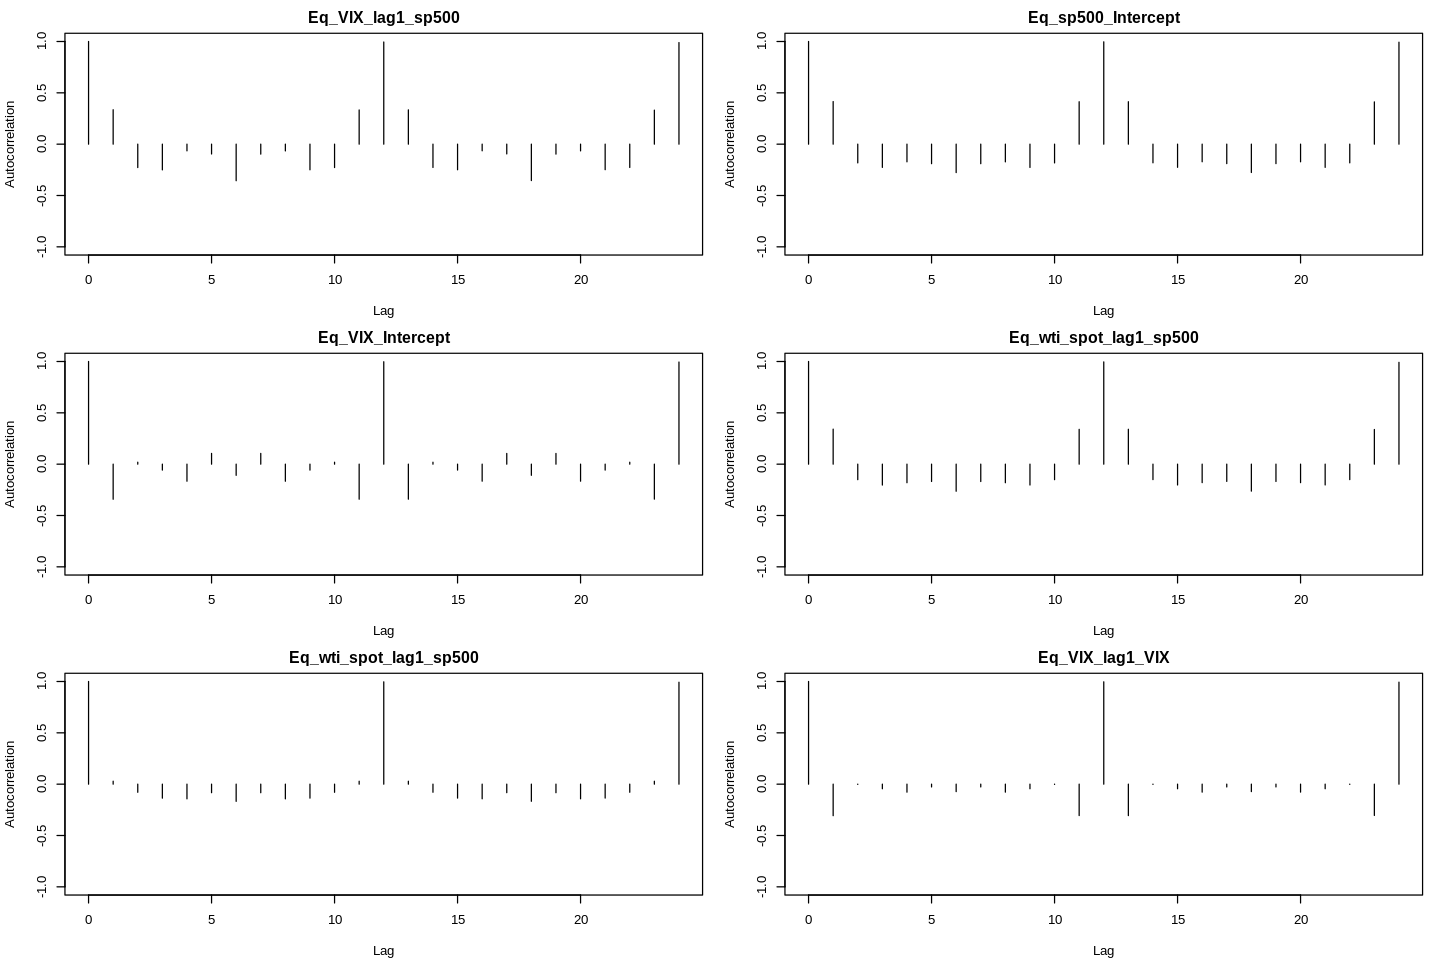

[1] "\nPlotting autocorrelation for 6 parameters with ESS < 100:"
[1] "Eq_VIX_lag1_wti_spot"   "Eq_VIX_Intercept"       "Eq_VIX_Intercept"      
[4] "Eq_VIX_lag1_wti_spot"   "Eq_sp500_lag1_wti_spot" "Eq_VIX_lag1_VIX"       


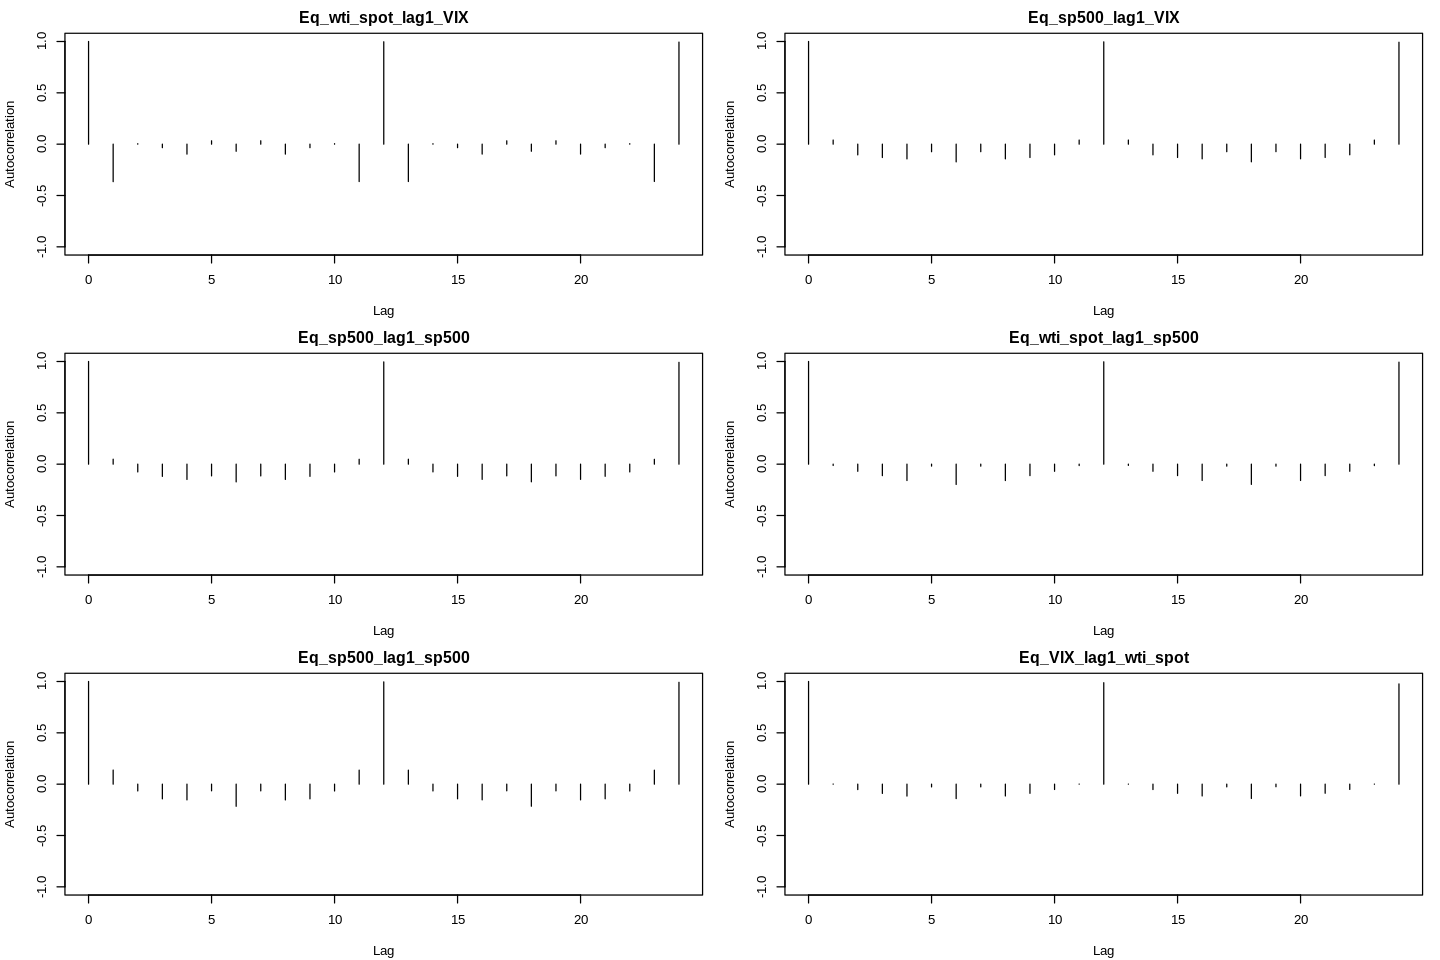

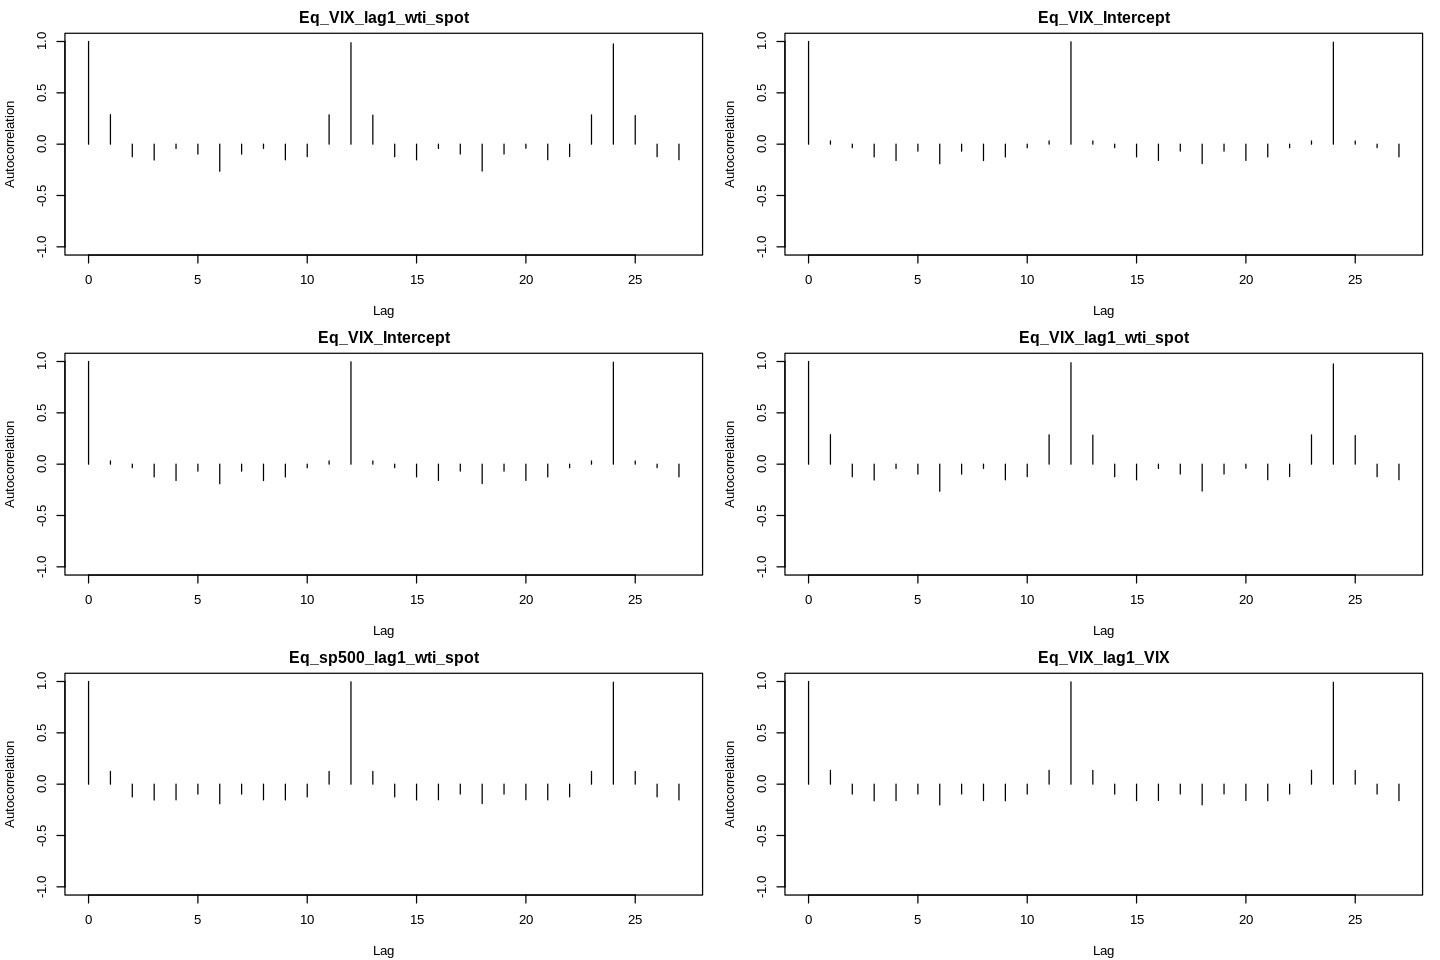

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
if (!exists("tvp_raw") || !("Beta.draws" %in% names(tvp_raw))) {
  print("Error: tvp_raw object or Beta.draws not found. Please run the bvar.sv.tvp function first.")
} else {

  beta_samples_array <- tvp_raw$Beta.draws
  n_params <- dim(beta_samples_array)[1]
  n_time <- dim(beta_samples_array)[2]
  n_draws <- dim(beta_samples_array)[3]

    var_names <- c("sp500", "wti_spot", "VIX")
  param_types <- c("Intercept", paste0("lag1_", var_names))

  param_names_one_time <- c()
  for (eq in var_names) {
      for (param_type in param_types) {
          param_names_one_time <- c(param_names_one_time, paste0("Eq_", eq, "_", param_type))
      }
  }
  all_param_names <- rep(param_names_one_time, n_time)

  mcmc_draws_matrix <- matrix(beta_samples_array, nrow = n_draws, ncol = n_params * n_time)
  colnames(mcmc_draws_matrix) <- all_param_names
  mcmc_draws <- as.mcmc(mcmc_draws_matrix)

  print("\nGenerating autocorrelation plots for a subset of Beta parameters:")
  n_plot_autocorr <- 12

  # Randomly sample parameters for plotting
  if (ncol(mcmc_draws) > 0) {
      if (ncol(mcmc_draws) >= n_plot_autocorr) {
          selected_params_autocorr <- sample(1:ncol(mcmc_draws), n_plot_autocorr)
          param_names_to_plot <- colnames(mcmc_draws)[selected_params_autocorr]

          print(paste0("Plotting autocorrelation for a random subset of ", n_plot_autocorr, " parameters:"))
          print(param_names_to_plot)

          par(mfrow = c(4, 3), mar = c(4, 4, 2, 1) + 0.1)
          autocorr.plot(mcmc_draws[, selected_params_autocorr], main = "")
          par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

      } else {
          print(paste0("Not enough parameters (", ncol(mcmc_draws), ") to plot ", n_plot_autocorr, " autocorrelation plots. Plotting all available."))
          par(mfrow = c(ceiling(ncol(mcmc_draws)/3), 3), mar = c(4, 4, 2, 1) + 0.1)
          autocorr.plot(mcmc_draws, main = "")
           par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)
      }
  } else {
      print("mcmc_draws object has no columns. Cannot generate autocorrelation plots.")
  }

  # autocorrelation for the first 6 parameters with ESS < 100 (if any)
  if (exists("low_ess_params_100") && length(low_ess_params_100) > 0) {
      n_plot_low_ess <- min(6, length(low_ess_params_100))
      params_to_plot_low_ess <- names(low_ess_params_100[1:n_plot_low_ess])

      print(paste0("\nPlotting autocorrelation for ", n_plot_low_ess, " parameters with ESS < 100:"))
      print(params_to_plot_low_ess)

      par(mfrow = c(2, 3), mar = c(4, 4, 2, 1) + 0.1)
      autocorr.plot(mcmc_draws[, params_to_plot_low_ess], main = "")
      par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)
  }

}

## **Summary Statistics for ALL flattened Beta parameters**

In [ ]:
if (!exists("tvp_raw")) {
  print("Error: tvp_raw object not found. Please run the bvar.sv.tvp function first.")
} else if (!("Beta.draws" %in% names(tvp_raw))) {
    print("Error: 'Beta.draws' not found in the tvp_raw object. Check the structure of tvp_raw.")
    print(str(tvp_raw))
} else {
    beta_samples_array <- tvp_raw$Beta.draws
    n_params <- dim(beta_samples_array)[1]
    n_time <- dim(beta_samples_array)[2]
    n_draws <- dim(beta_samples_array)[3]

    mcmc_draws_matrix <- matrix(beta_samples_array, nrow = n_draws, ncol = n_params * n_time)
    mcmc_draws <- as.mcmc(mcmc_draws_matrix)
    all_ess <- effectiveSize(mcmc_draws)
    ess_summary <- summary(all_ess)

    print("Effective Sample Size (ESS) Summary Statistics for ALL flattened Beta parameters:")
    print(ess_summary)

    low_ess_threshold_100 <- sum(all_ess < 100)
    low_ess_threshold_500 <- sum(all_ess < 500)

    print(paste0("Number of parameters with ESS < 100: ", low_ess_threshold_100))
    print(paste0("Number of parameters with ESS < 500: ", low_ess_threshold_500))}

[1] "Effective Sample Size (ESS) Summary Statistics for ALL flattened Beta parameters:"
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      8.9     482.7    2096.5   13158.1    8653.5 1812066.5 
[1] "Number of parameters with ESS < 100: 898"
[1] "Number of parameters with ESS < 500: 3075"
[1] "\nEffective Sample Size (ESS) Summary Statistics for ALL flattened logs2 parameters:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  330.5   653.1   757.9   768.0   865.8  1723.2 
[1] "Number of logs2 parameters with ESS < 100: 0"
[1] "Number of logs2 parameters with ESS < 500: 279"


## **summary statistics for SV variances**

In [ ]:
if (!exists("tvp_raw")) {
  print("Error: tvp_raw object not found. Please run the bvar.sv.tvp function first.")
} else if (!("logs2.draws" %in% names(tvp_raw))) {
    print("Error: 'logs2.draws' not found in the tvp_raw object. Check the structure of tvp_raw.")
    print(str(tvp_raw))
} else {
    h_samples_array <- tvp_raw$logs2.draws
    n_vars <- dim(h_samples_array)[1]
    n_time <- dim(h_samples_array)[2]
    n_draws <- dim(h_samples_array)[3]

    h_mcmc_matrix <- matrix(h_samples_array, nrow = n_draws, ncol = n_vars * n_time)
    h_mcmc <- as.mcmc(h_mcmc_matrix)
    all_h_ess <- effectiveSize(h_mcmc)
    h_ess_summary <- summary(all_h_ess)

    print("\nEffective Sample Size (ESS) Summary Statistics for ALL flattened logs2 parameters:")
    print(h_ess_summary)

    low_h_ess_threshold_100 <- sum(all_h_ess < 100)
    low_h_ess_threshold_500 <- sum(all_h_ess < 500)

    print(paste0("Number of logs2 parameters with ESS < 100: ", low_h_ess_threshold_100))
    print(paste0("Number of logs2 parameters with ESS < 500: ", low_h_ess_threshold_500))}

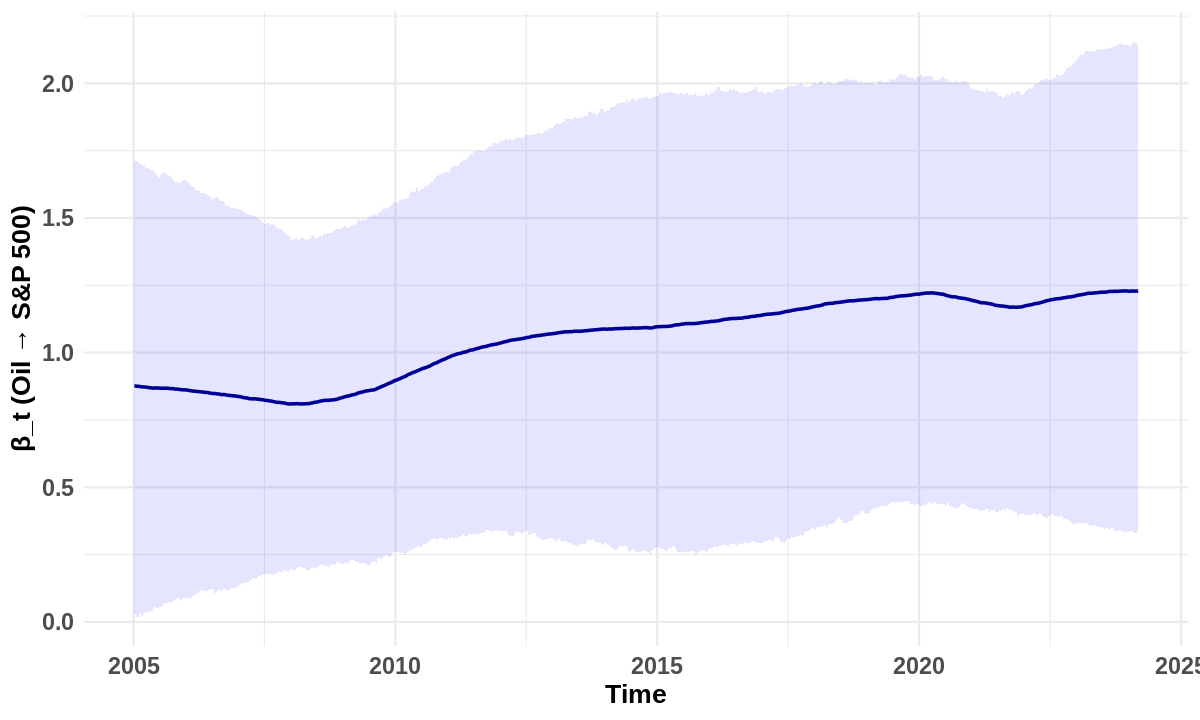

In [ ]:
library(coda)
library(ggplot2)

if (!exists("tvp_raw") || !exists("param_index")) {
  stop("Error: tvp_raw object or param_index not found. Please run the bvar.sv.tvp function and define target_param/param_index first.")
}

beta_mean <- apply(beta_draws, 1, mean)
beta_lower <- apply(beta_draws, 1, quantile, probs = 0.025)
beta_upper <- apply(beta_draws, 1, quantile, probs = 0.975)

n_time <- dim(beta_draws)[1]
time_axis <- seq.Date(from = as.Date("2005-01-07"), by = "week", length.out = n_time)

beta_df <- data.frame(
  Time = time_axis,
  Mean = beta_mean,
  Lower = beta_lower,
  Upper = beta_upper)

ggplot(beta_df, aes(x = Time, y = Mean)) +
  geom_line(color = "darkblue", size = 1) +
  geom_ribbon(aes(ymin = Lower, ymax = Upper), alpha = 0.1, fill = "blue") +
  labs(
    y = "β_t (Oil → S&P 500)",
    x = "Time"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.title = element_text(face = "bold", size = 16),
    axis.text = element_text(face = "bold", size = 14)
  )